In [ ]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import pandas_datareader.data as web
import fix_yahoo_finance as yf
import math
import matplotlib.pyplot as plt

In [ ]:
def get_stock_df():
    print('Enter the stock you want to look at (stock symbol): ')
    ticker = input()
    print('Enter the start time (in the form "year-month-date" e.g. 2017-10-01): ')
    start_date = input()
    start_list = start_date.split('-')
    start = datetime.datetime(int(start_list[0]),int(start_list[1]),int(start_list[2]))
    print('Enter the end time (in the form "year-month-date" e.g. 2017-10-01): ')
    end_date = input()
    end_list = end_date.split('-')
    end = datetime.datetime(int(end_list[0]),int(end_list[1]),int(end_list[2]))
    df = yf.download(ticker,start = start,end = end)
    return df

In [ ]:
def get_simple_moving_average(df, window):
    df['Normal Return'] = df['Adj Close'].pct_change()
    df[str(window) + ' SMA'] = df['Adj Close'].rolling(window).mean()
    df['Signal'] = np.where(df[str(window) + 'day MA'] > df['Adj Close'],1,0)
    df['Log Return'] = df['Normal Return'].apply(lambda x:math.log(x+1))
    df['Strat Daily Return'] = np.where(df['Signal'] == 1, -df['Log Return'],0)
    df['Cumulative Sum'] = df['Strat Daily Return'].cumsum()
    plt.plot(df.reset_index()['Date'],df['Adj Close'], label = 'Close Price')
    plt.plot(df.reset_index()['Date'],df[str(window) + ' SMA'], label = str(window) + ' SMA')
    plt.legend()
    plt.title('Cumulative Return in %')
    plt.show()
    if df['Cumulative Sum'][-1] >= 0:
        print('Recomendation:')
        print('The simple moving average startegy of window ' + str(window) + ' yields a positive cumulative return. Hence, the strategy could be taken into consideration.')
    else:
        print('Recommendation:')
        print('The simple moving average startegy of window ' + str(window) + ' yields a negative cumulative return. Hence, the strategy should not be taken into consideration.')
    
    return df,df['Cumulative Sum'][-1]

In [ ]:
def get_exponential_moving_average(df,window):
    df[str(window) + ' EMA'] = pd.Series.ewm(df['Adj Close'], span=window).mean()
    df['Signal'] = np.where(df[str(window) + ' EMA'] > df['Adj Close'],1,0)
    df['Normal Return'] = df['Adj Close'].pct_change()
    df['Log Return'] = df['Normal Return'].apply(lambda x:math.log(x+1))
    df['Strat Daily Return'] = np.where(df['Signal'] == 1, -df['Log Return'],0)
    df['Cumulative Sum'] = df['Strat Daily Return'].cumsum()
    plt.plot(df.reset_index()['Date'],df['Adj Close'], label = 'Close Price')
    plt.plot(df.reset_index()['Date'],df[str(window) + ' EMA'], label = str(window) + ' EMA')
    plt.legend()
    plt.title('Cumulative Return in %')
    plt.show()
    if df['Cumulative Sum'][-1] >= 0:
        print('Recomendation:')
        print('The exponential moving average startegy of window ' + str(window) + ' yields a positive cumulative return. Hence, the strategy could be taken into consideration.')
    else:
        print('Recommendation:')
        print('The exponential moving average startegy of window ' + str(window) + ' yields a negative cumulative return. Hence, the strategy should not be taken into consideration.')
    return df,df['Cumulative Sum'][-1]

In [ ]:
def get_current_index():
    import requests
    import pandas as pd
    from bs4 import BeautifulSoup
    index_dict = dict()
    url = "https://www.briefing.com/investor/markets/stock-market-update/"
    response = requests.get(url)
    print(response.status_code)
    results_page = BeautifulSoup(response.content,'lxml')
    all_td_tags = results_page.find_all('td', valign="top")
    count = 1
    index_list = []
    for tag in all_td_tags:
        if count % 4 == 1:
            index_name = tag.get_text()
        elif count % 4 == 2:
            index_data = tag.get_text()
        elif count % 4 == 3:
            index_change = tag.get_text()
        elif count % 4 == 0:
            index_change_pct = tag.get_text().strip()
            index_change_pct = index_change_pct.replace('(','')
            index_change_pct = index_change_pct.replace(')','')
            index_change_pct = index_change_pct.replace('%','')
            index_tuple = (index_name,index_data,index_change,index_change_pct)
            index_list.append(index_tuple)
        if count == 12:
            break
        count+=1
    
    index_name_list = [index_list[i][0] for i in range(3)]
    index_data_list = [index_list[i][1] for i in range(3)]
    index_change_list = [index_list[i][2] for i in range(3)]
    index_change_pct_list = [index_list[i][3] for i in range(3)]
    index_ = ['Current Data', 'Change', '%Change']
    columns_ = index_name_list
    df = pd.DataFrame([index_data_list,index_change_list,index_change_pct_list], index = index_, columns = columns_)
    return df

In [ ]:
def get_current_industry_watch():
    import requests
    import pandas as pd
    from bs4 import BeautifulSoup
    index_dict = dict()
    url = "https://www.briefing.com/investor/markets/stock-market-update/"
    response = requests.get(url)
    results_page = BeautifulSoup(response.content,'lxml')
    all_td_tags = results_page.find_all('td', valign="top")
    count = 1
    strong_list = []
    weak_list = []
    for tag in all_td_tags:
        if count == 17:
            print(tag.get_text())
        if count == 18:
            print(tag.get_text())
        count += 1

In [ ]:
def get_moving_the_market():
    import requests
    import pandas as pd
    from bs4 import BeautifulSoup
    index_dict = dict()
    url = "https://www.briefing.com/investor/markets/stock-market-update/"
    response = requests.get(url)
    results_page = BeautifulSoup(response.content,'lxml')
    all_td_tags = results_page.find_all('td')
    count = 1
    for tag in all_td_tags:
        if count == 32:
            print("Moving the Market:")
            print(tag.get_text())
        count+=1

In [5]:
import pandas_datareader.data as web

def get_SNP_plot(start,end):
    df_SNP = web.DataReader('^GSPC', 'yahoo', start=start, end=end)['Adj Close']
    df_SNP.plot(title = "S&P 500 Historical Data")
    
def get_DJI_plot(start,end):
    df_DJI = web.DataReader('^DJI', 'yahoo', start=start, end=end)['Adj Close']
    df_DJI.plot(title = "DJI Historical Data")
    
def get_IXIC_plot(start,end):
    df_IXIC = web.DataReader('^IXIC', 'yahoo', start=start, end=end)['Adj Close']
    df_IXIC.plot(title = 'IXIC Historical Data')
    

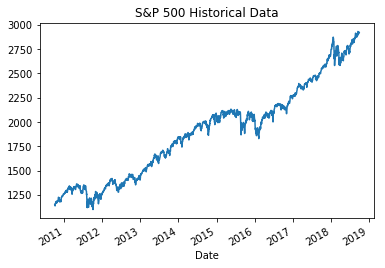

In [6]:
get_SNP_plot('2010-10-01','2018-10-01')